In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import seaborn as sns

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
from sklearn.metrics import mean_squared_error

In [93]:
from pprint import pprint

out = open('OUTPUT_DRAFT2.csv').read().split('\n')

yards = {year: {} for year in range(2004, 2014)}

for o in out[1:-1]:
    os = o.split(',')
    if os[9]:
        y = float(os[9].replace('*',''))
        yr = int(os[0])
        pos = os[4]
        if pos not in yards[yr]:
            yards[yr][pos] = []
        yards[yr][pos].append(y)

headers = out[0].split(',')
poss = ['DT','QB','OG','C','WR','RB','FB','CB','FS','TE','DE','SS','OLB','ILB','OT']

yards_avg = {year: {pos: sum(yards[year][pos])/len(yards[year][pos]) for pos in poss} for year in range(2004,2014)}

uQB = ['AP Poll Points', 'Height', 'Weight', 'Yard', 'Vert Leap', 'Broad Jump', 'Shuttle', '3 Cone']
usable1 = uQB + ['Bench Press']

avgs_P = pd.read_csv('year-pos-mean-combine.csv')

out_D2 = {header: [] for header in headers}

for o in out[1:-1]:
    o = o.split(',')
    for i in range(len(headers)):
        if headers[i] in usable1:
            try:
                oi = o[i].replace('*','')
                f = float(oi)
            except ValueError:
                year = o[0]
                pos = o[4]
                if headers[i] != 'Yard':
                    for index, row in avgs_P.iterrows():
                        if row['Year'] == int(year) and row['POS'] == pos:
                            o[i] = row[headers[i]]
                else:
                    o[i] = yards_avg[int(year)][pos]
        out_D2[headers[i]].append(o[i])
        
P2 = pd.DataFrame(out_D2)

P2

,3 Cone,AP Poll Points,Arm Length,Bench Press,Broad Jump,College,DRAFT,G,G3,GS,GS3,Hand Size,Height,Name,POS,Shuttle,Vert Leap,Weight,Yard,Year
0,7.81,0.1,,27,114,Kansas,125,11,9,5.2,5,,76,Adrian Jones,OT,4.6,31,296,4.97,2004
1,7.93,14.11,,23.6667,102,Ohio State,30,14,0,9,0,,77,Adrien Clarke,OG,4.79,26,329,5.52,2004
2,8.75,0.6,,27.7333,86,Alabama,0,0,0,0,0,,78,Ahmad Childress,DT,4.94,22,351,5.28,2004
3,7.96,0.2,,26,98,Texas A&M;,0,0,0,0,0,,78,Alan Reuber,OG,5,29,314,5.49,2004
4,7.06,0.7,,25,121,Wisconsin,117,10.4,12.5,1.8,2.5,,73,Alex Lewis,OLB,4.31,34.5,228,4.78,2004
5,7.64,14.11,,24.2,96,Ohio State,157,9.2,8,6.8,2,,76,Alex Stepanovich,C,4.54,25.5,304,5.29,2004
6,7.32,0,,NaN,121,Southern Oregon,0,8.5,0,0.5,0,,71,Andrae Thurman,WR,4.33,34.5,192,4.54,2004
7,7.46,8.33,,16,107,Kansas State,0,0,0,0,0,,77,Andrew Shull,DE,4.28,30.5,265,4.9,2004
8,8.15,0,,27,101,Kentucky,0,0,0,0,0,,76,Antonio Hall,OG,4.56,26.5,317,5.54,2004
9,7.31188,0.3,,24,108,Oklahoma State,122,14.1871921182,15.4838709677,10.4827586207,12.0774193548,,76,Antonio Smith,DE,4.75,33,274,5.03,2004


In [100]:
for pos in poss:
    print('\n\n\n--------------' + pos + '---------------')
    P_pos = P2.loc[P2['POS'] == pos]
    
    if pos == 'QB':
        X_P_H = P_pos[uQB]
    else:
        X_P_H = P_pos[usable1]
    print('Complete dataset shape is {}'.format(X_P_H.shape))
    y_P_H = P_pos.DRAFT;

    X_P_H, y_P_H = utils.shuffle(X_P_H, y_P_H, random_state=1)
    X_P_H_train, X_P_H_test, y_P_H_train, y_P_H_test = cross_validation.train_test_split(
        X_P_H, y_P_H, test_size=0.4, random_state=0)

    subX_train = X_P_H_train[X_P_H_train.columns[0]]
    subX_test = X_P_H_test[X_P_H_test.columns[0]]
    
    model = sm.OLS(y_P_H_train.astype(float), X_P_H_train.astype(float), missing='drop')
    results = model.fit()
    print(results.summary())




--------------DT---------------
Complete dataset shape is (156, 9)
                            OLS Regression Results                            
Dep. Variable:                  DRAFT   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     14.43
Date:                Wed, 14 Dec 2016   Prob (F-statistic):           8.14e-14
Time:                        03:02:42   Log-Likelihood:                -541.09
No. Observations:                  93   AIC:                             1100.
Df Residuals:                      84   BIC:                             1123.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------




--------------DT---------------
Complete dataset shape is (156, 9)
                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     8.387
Date:                Tue, 13 Dec 2016   Prob (F-statistic):           9.16e-09
Time:                        19:54:42   Log-Likelihood:                -253.18
No. Observations:                  91   AIC:                             524.4
Df Residuals:                      82   BIC:                             547.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------

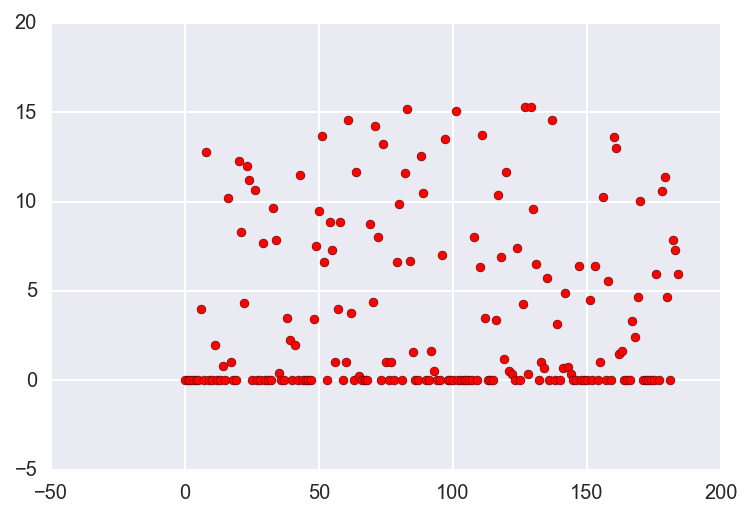

In [53]:

for pos in poss:
#     print('\n\n\n--------------' + pos + '---------------')
    P_pos = P2.loc[P['POS'] == pos]
    
    if pos == 'QB':
        X_P_H = P_pos[uQB]
    else:
        X_P_H = P_pos[usable1]
    print('Complete dataset shape is {}'.format(X_P_H.shape))
    y_P_H = P_pos.GS;

    X_P_H, y_P_H = utils.shuffle(X_P_H, y_P_H, random_state=1)
    X_P_H_train, X_P_H_test, y_P_H_train, y_P_H_test = cross_validation.train_test_split(
        X_P_H, y_P_H, test_size=0.4, random_state=0)

    subX_train = X_P_H_train[X_P_H_train.columns[0]]
    subX_test = X_P_H_test[X_P_H_test.columns[0]]
    
    model = sm.OLS(y_P_H_train.astype(float), X_P_H_train.astype(float), missing='drop')
    results = model.fit()
    print(results.summary())

In [88]:
all_predictions_D=[]
all_results_D=[]
for pos in poss:
#     print('\n\n\n--------------' + pos + '---------------')
    P_pos = P2.loc[P2['POS'] == pos]
    
    if pos == 'QB':
        X_P_H = P_pos[uQB]
    else:
        X_P_H = P_pos[usable1]
#     print('Complete dataset shape is {}'.format(X_P_H.shape))
    y_P_H = P_pos.DRAFT;

    X_P_H, y_P_H = utils.shuffle(X_P_H, y_P_H, random_state=1)
    X_P_H_train, X_P_H_test, y_P_H_train, y_P_H_test = cross_validation.train_test_split(
        X_P_H, y_P_H, test_size=0.4, random_state=0)

    subX_train = X_P_H_train[X_P_H_train.columns[0]]
    subX_test = X_P_H_test[X_P_H_test.columns[0]]
    
    model = sm.OLS(y_P_H_train.astype(float), X_P_H_train.astype(float), missing='drop')
    results = model.fit()
    predictions = results.predict(X_P_H_test.astype(float))
    all_predictions_D.append(predictions)
    all_results_D.append([float(x) for x in list(y_P_H_test)])

    

D_errors=[]
for i in range(len(all_predictions_D)):
    pos_error= []
    for j in range(len(all_predictions_D[i])):
        pos_error.append(all_predictions_D[i][j] - all_results_D[i][j])
    D_errors.append(pos_error)

In [51]:
for i in range(len(poss)):
    print(poss[i],' errors in terms predicted draft values and actual drafted values are',D_errors[i])

    

DT  errors in terms predicted draft values and actual drafted values are [-139.05446328685787, -94.769030142019389, -100.39113489433606, -134.46244733752508, -89.159053592998873, -123.12616013915226, 56.871772088430561, -128.6130116191124, 63.457054941288845, 96.615089725528819, 16.69341402711521, 69.370253265863496, 50.234778784377326, -59.909633950041751, -82.777118969488768, 61.533184742434884, 103.36555167770156, -6.3577119817780954, -95.127453503016227, 40.525034768081483, 11.656882486555247, -18.302919445683358, 131.0276774244343, 64.342056463365822, 44.317426858979971, -15.439298706103003, -83.429086045171942, 13.900399230204201, -37.338785785394478, -19.752387095888338, 61.598324351900288, 69.166357427740593, -90.622080122680956, -29.470185386898549, -43.129553403663834, 116.3381198066589, -76.992101707425604, -147.3481663102516, -30.861503942898295, -47.418807983913965, 49.418389503210349, 19.725602273282249, 66.865677942635955, 7.2558559494611785, -72.538934617559619, 63.4128

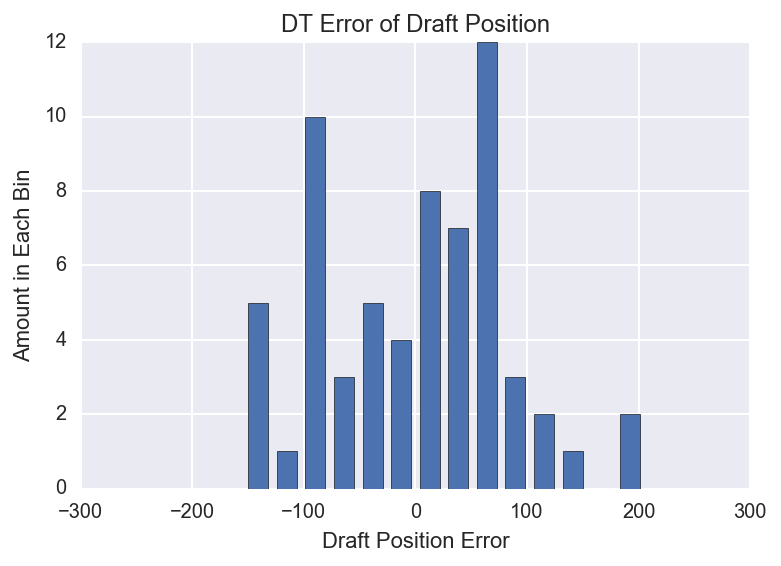

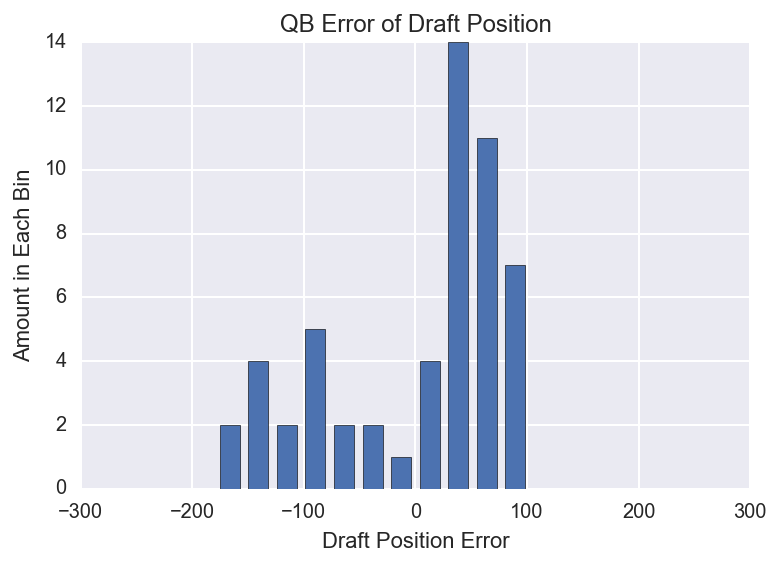

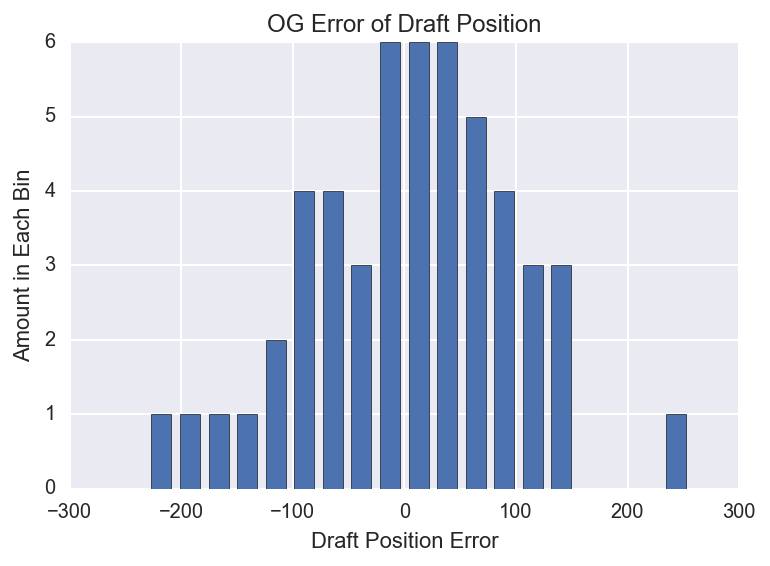

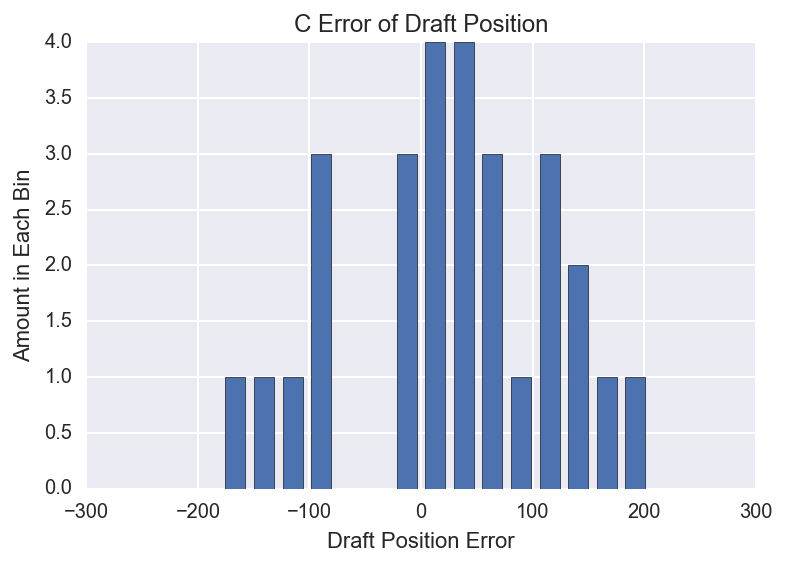

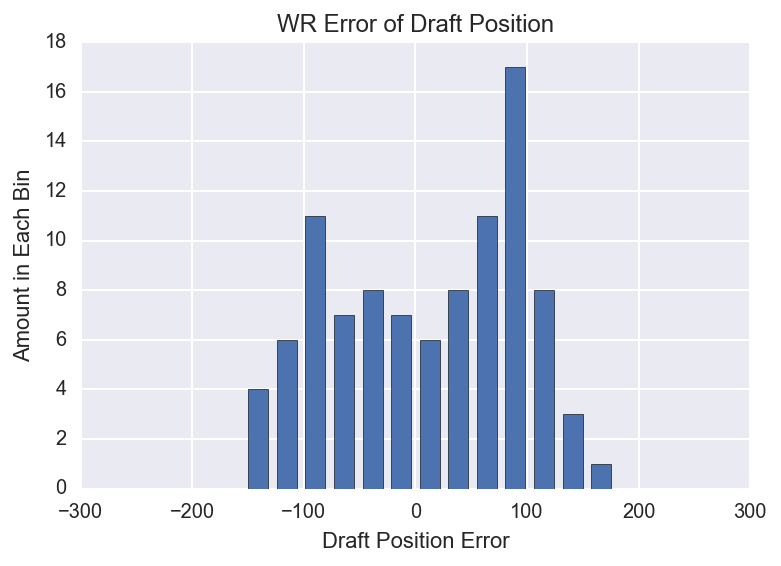

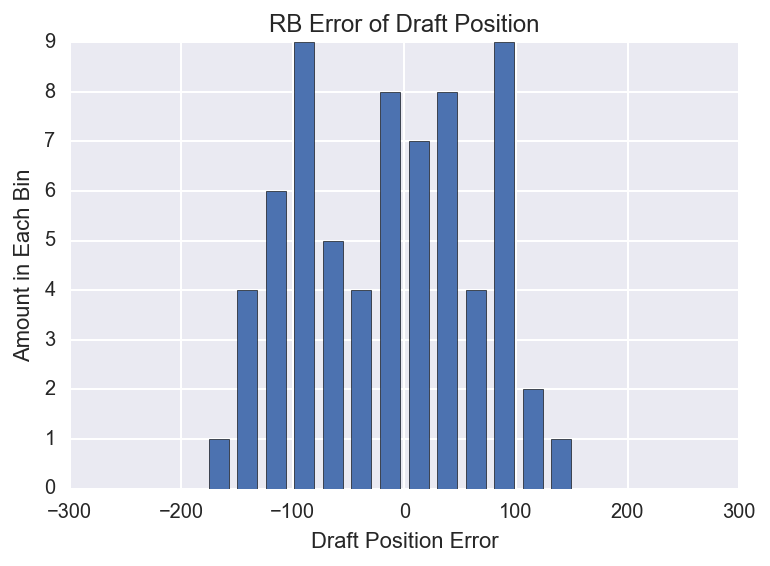

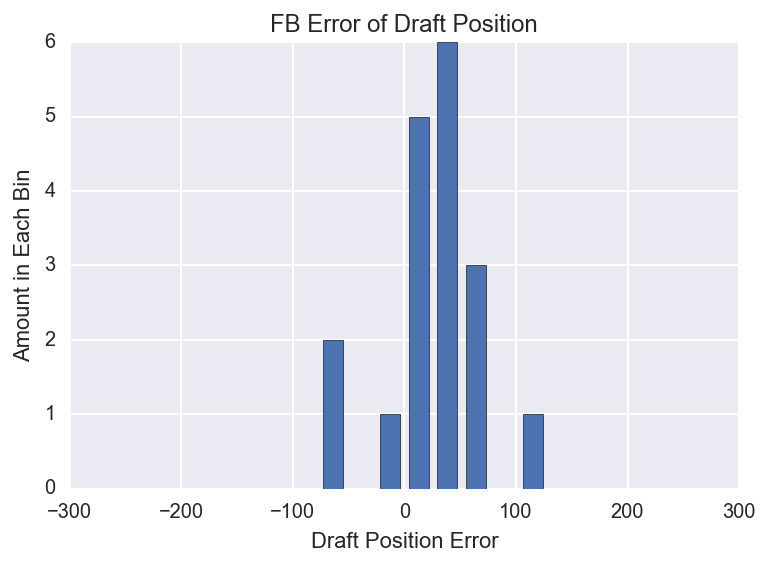

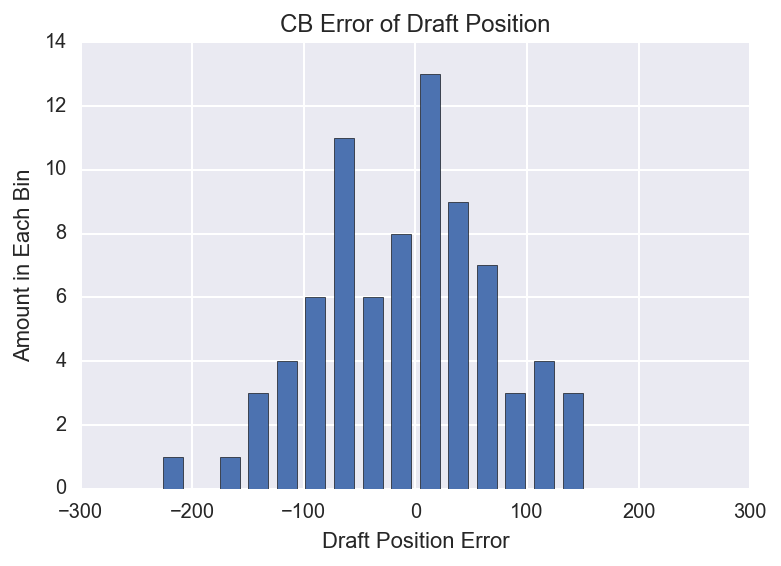

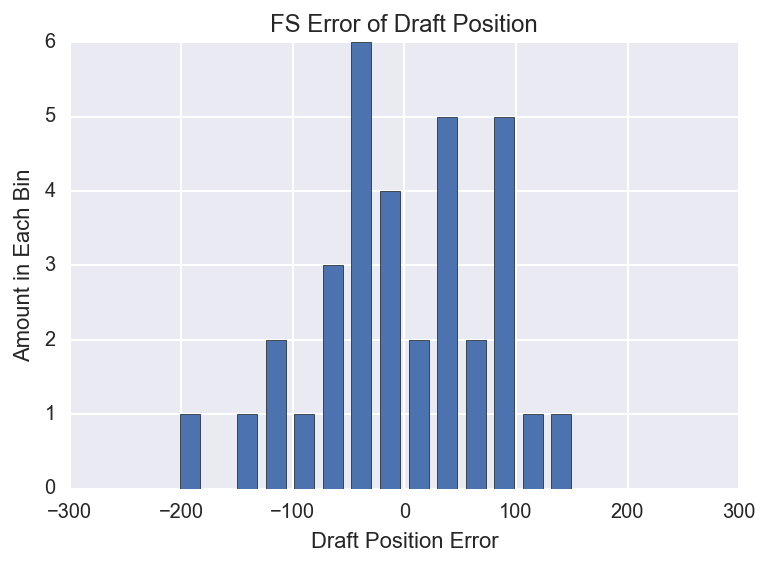

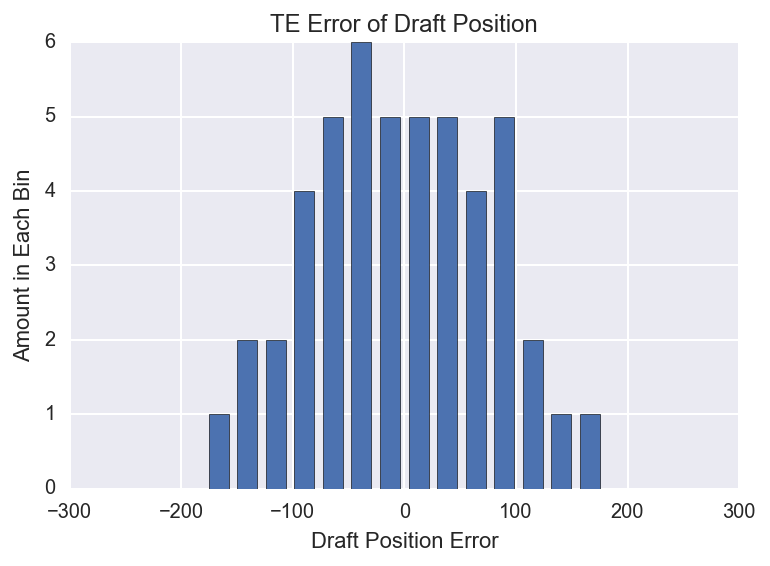

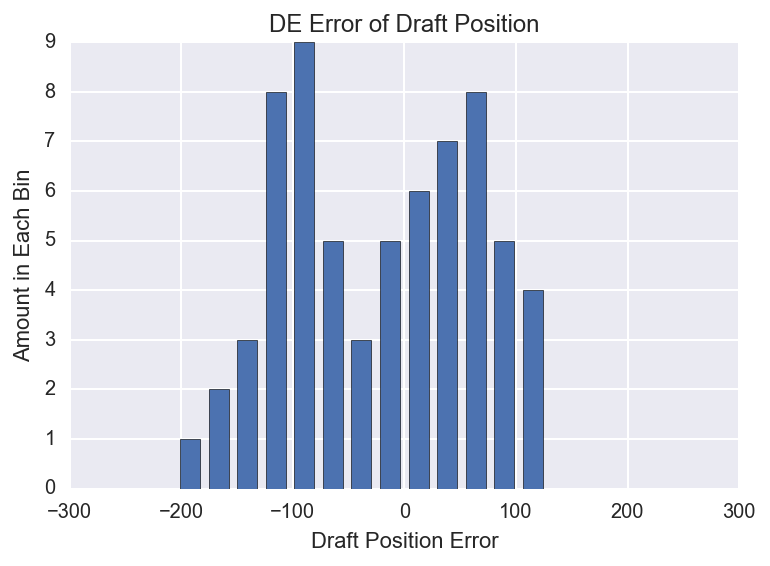

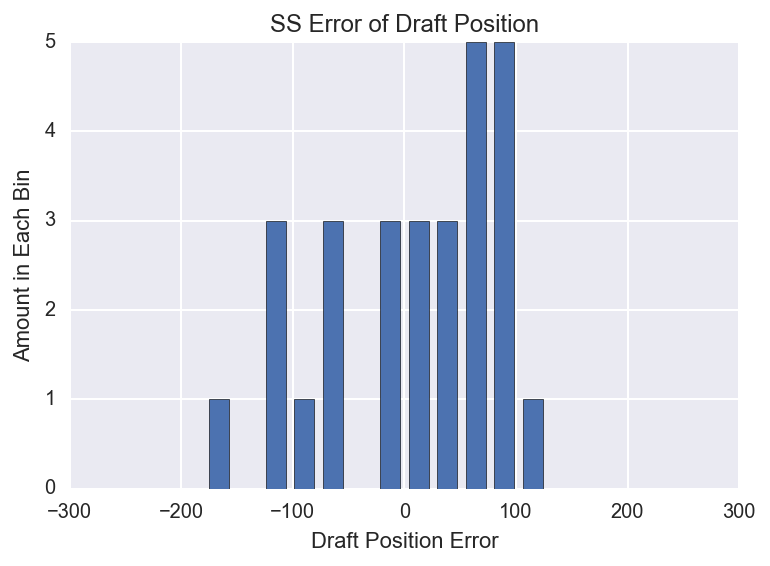

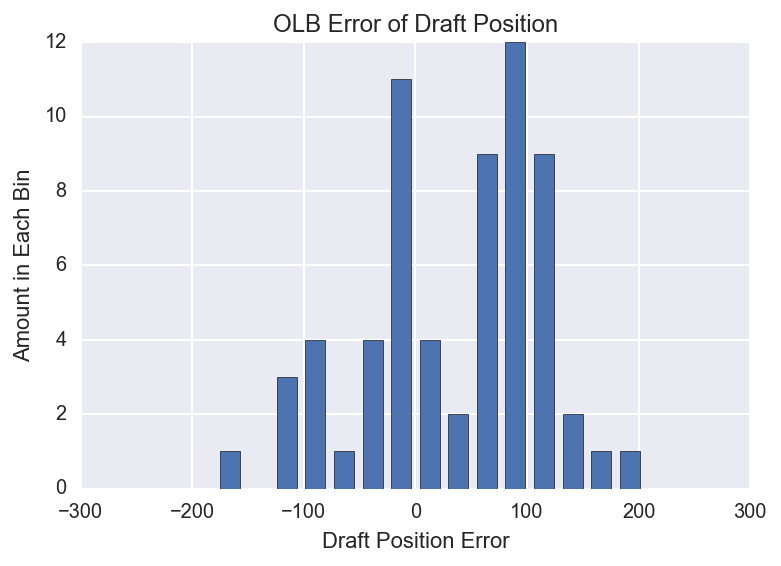

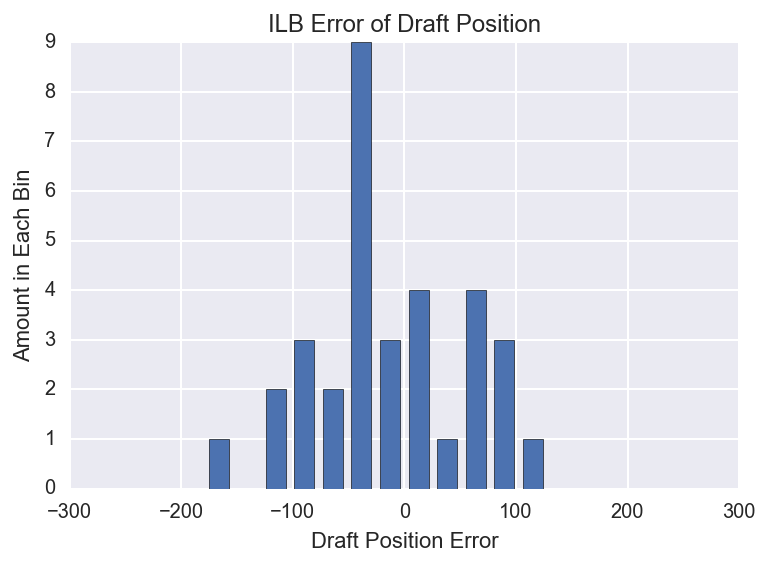

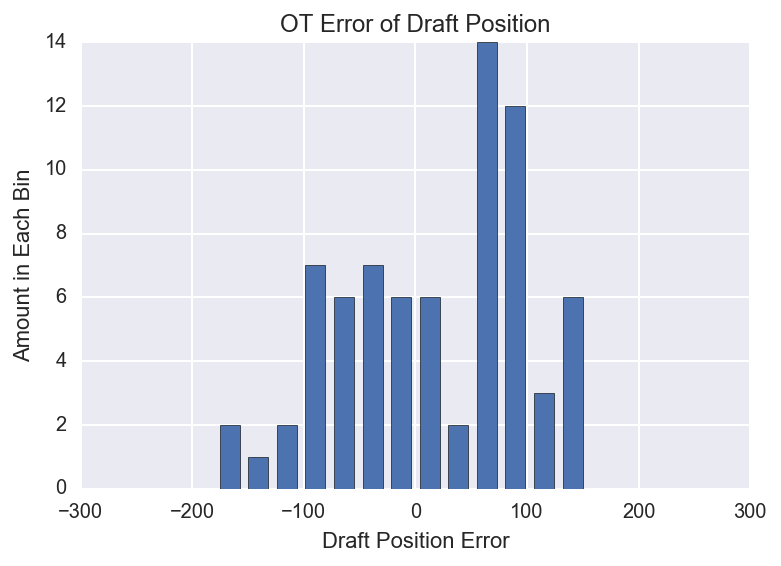

In [98]:
for i in range(len(D_errors)):
    hist, bins = np.histogram(D_errors[i], bins=20,range=(-256,256))
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.title('{} Error of Draft Position'.format(poss[i]))
    plt.ylabel('Amount in Each Bin')
    plt.xlabel('Draft Position Error')
    plt.show()
    

In [89]:
all_predictions_GS=[]
all_results_GS=[]
for pos in poss:
#     print('\n\n\n--------------' + pos + '---------------')
    P_pos = P2.loc[P2['POS'] == pos]
    
    if pos == 'QB':
        X_P_H = P_pos[uQB]
    else:
        X_P_H = P_pos[usable1]
#     print('Complete dataset shape is {}'.format(X_P_H.shape))
    y_P_H = P_pos.GS;

    X_P_H, y_P_H = utils.shuffle(X_P_H, y_P_H, random_state=1)
    X_P_H_train, X_P_H_test, y_P_H_train, y_P_H_test = cross_validation.train_test_split(
        X_P_H, y_P_H, test_size=0.4, random_state=0)

    subX_train = X_P_H_train[X_P_H_train.columns[0]]
    subX_test = X_P_H_test[X_P_H_test.columns[0]]
    
    model = sm.OLS(y_P_H_train.astype(float), X_P_H_train.astype(float), missing='drop')
    results = model.fit()
    predictions = results.predict(X_P_H_test.astype(float))
    all_predictions_GS.append(predictions)
    all_results_GS.append([float(x) for x in list(y_P_H_test)])

G_errors=[]
for i in range(len(all_predictions_GS)):
    pos_error= []
    for j in range(len(all_predictions_GS[i])):
        pos_error.append(all_predictions_GS[i][j] - all_results_GS[i][j])
    G_errors.append(pos_error)

    

In [90]:
for i in range(len(poss)):
    print(poss[i],' errors in terms predicted draft values and actual drafted values are', G_errors[i])

DT  errors in terms predicted draft values and actual drafted values are [-5.2918156802786465, 1.4941931634587462, -3.6681319708438451, -7.6479123891221201, -6.910734878327764, -8.3841031658948708, 1.344301893777069, -5.6991380213310308, 5.7258628365168036, 3.5721875901600555, -2.0224372070208831, -0.35836422203966833, -9.9881220155597994, -4.7273283907589354, -11.640732704564169, 2.1653549440133268, 6.6048405021348007, 2.6036379764896056, -12.120305439131052, -1.7263316149666488, 3.0844539754697697, -4.0943167671273031, -5.040087619973793, 3.1444665950268424, 2.6782563141606568, -0.44485731836828091, 3.8977307249952799, 1.2540390741895218, 2.4342332623085809, 3.8044308075843176, -0.62502232444103711, -0.56106093749288011, 1.6936986038580129, 6.8256810171407913, -6.095516878453938, -0.76621846170558161, -7.6437751070463777, 0.52029268912270599, 5.9637402268297421, -1.6655972002224946, 2.3172220090830145, 2.8680348624391456, 1.6123948697413337, 3.0021206676196011, 3.693934396359031, 2.4

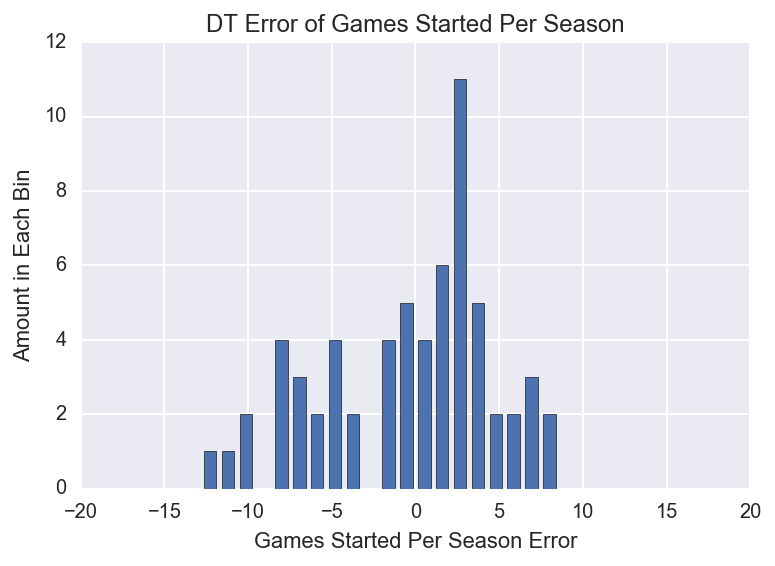

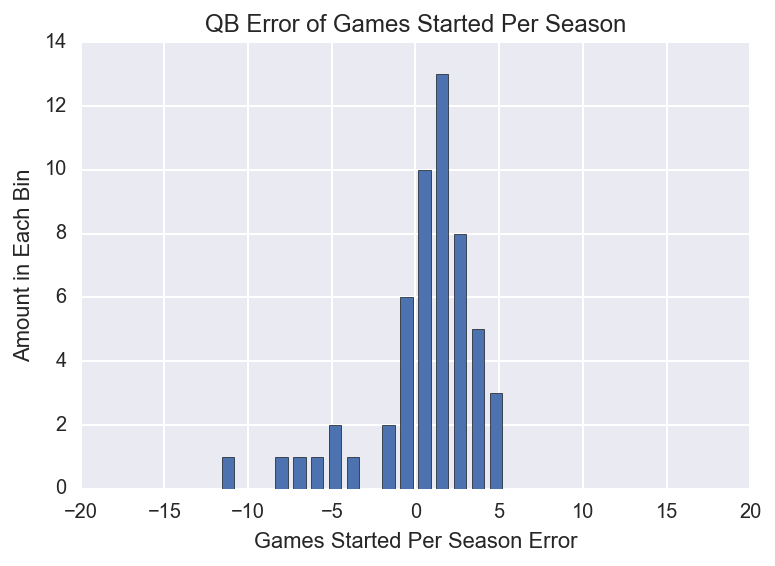

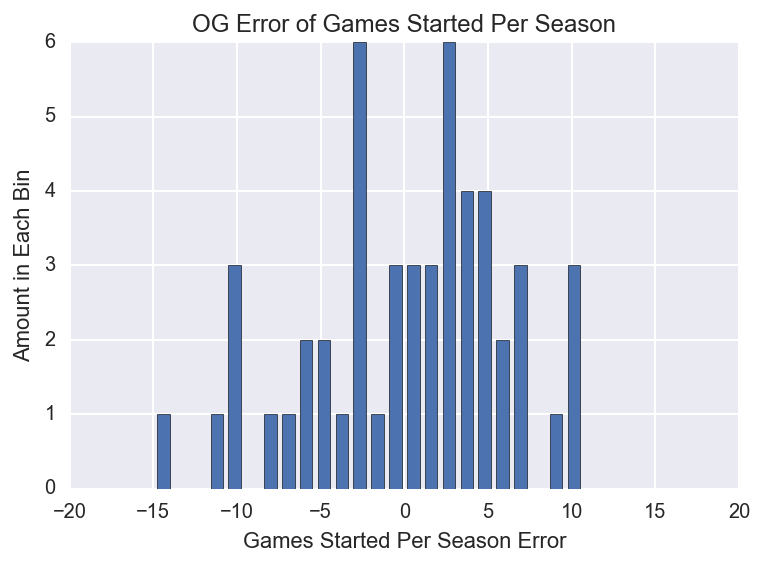

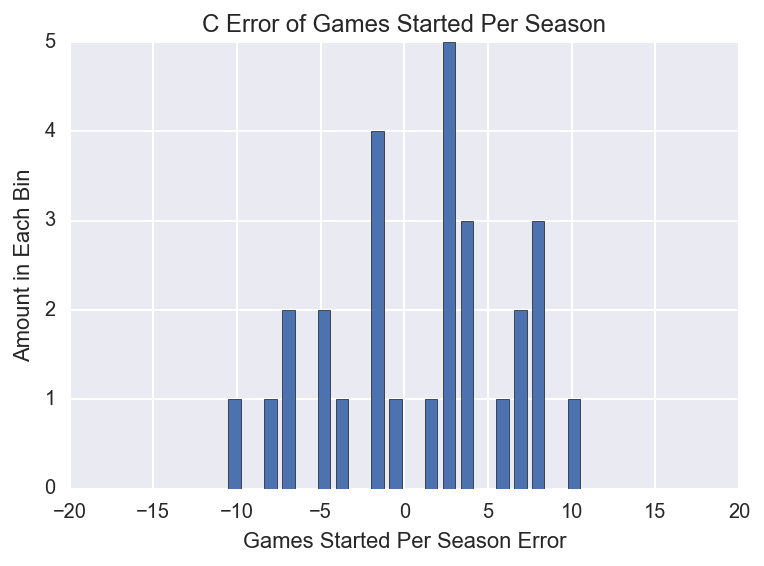

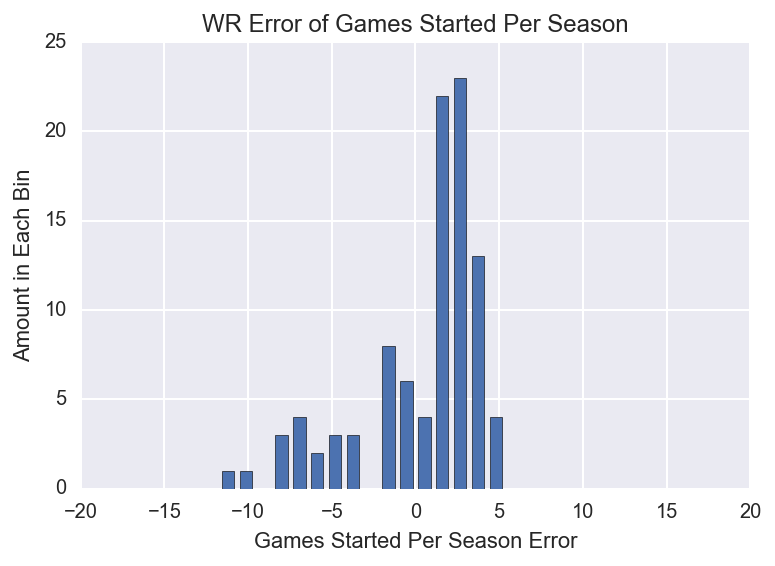

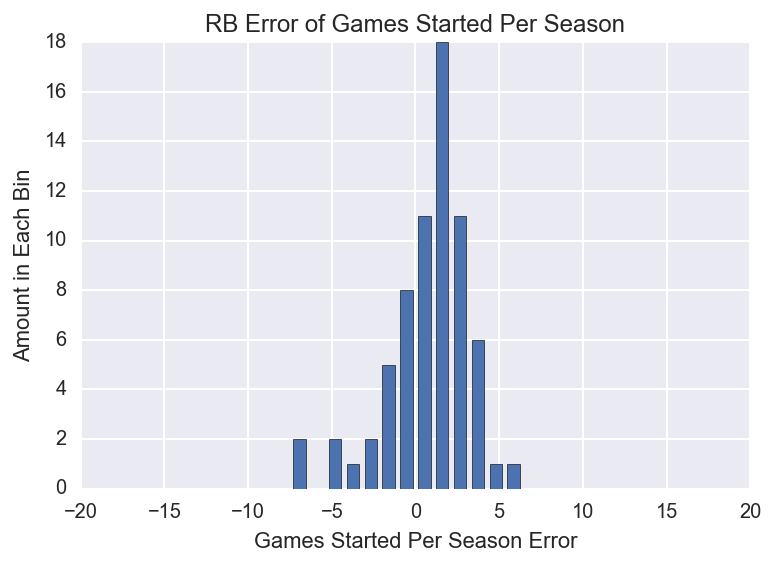

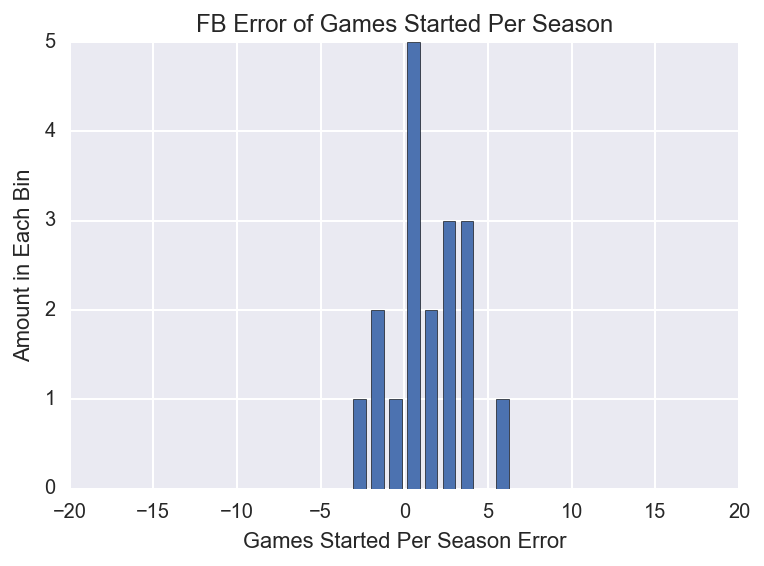

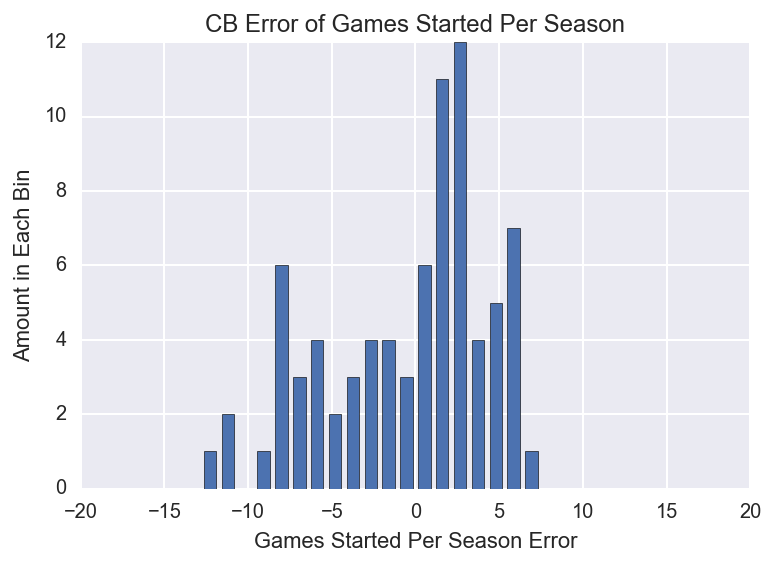

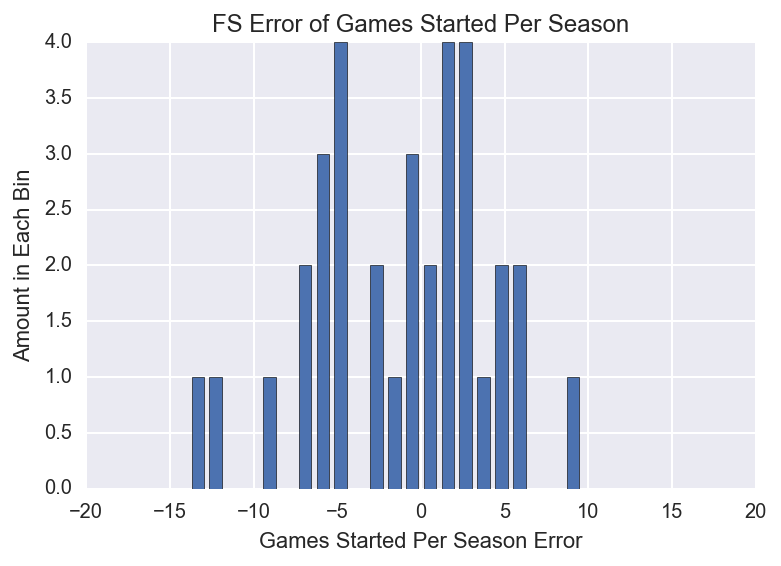

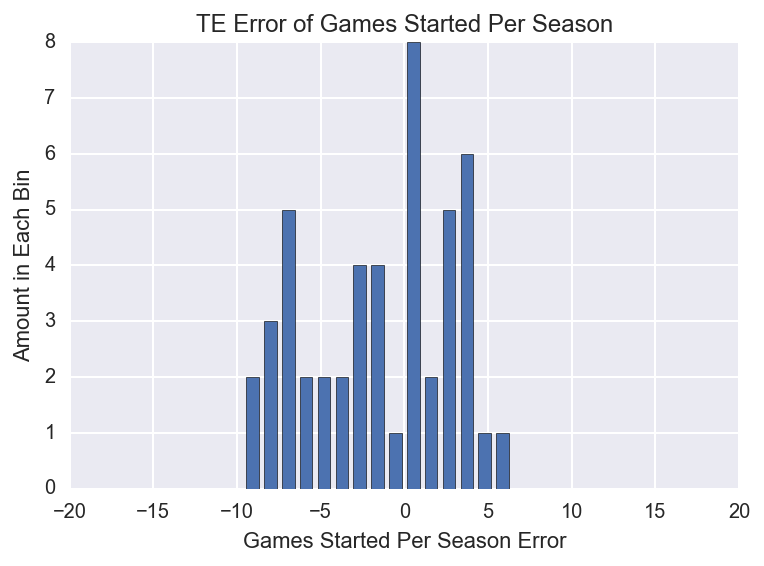

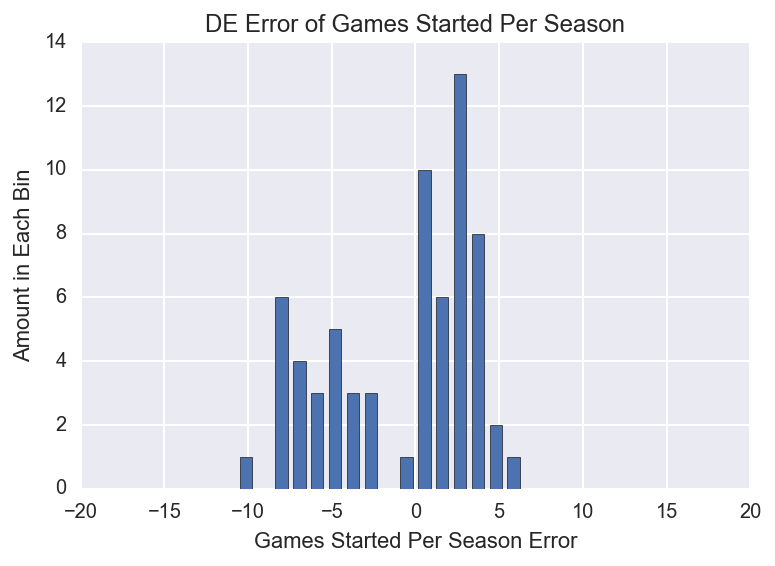

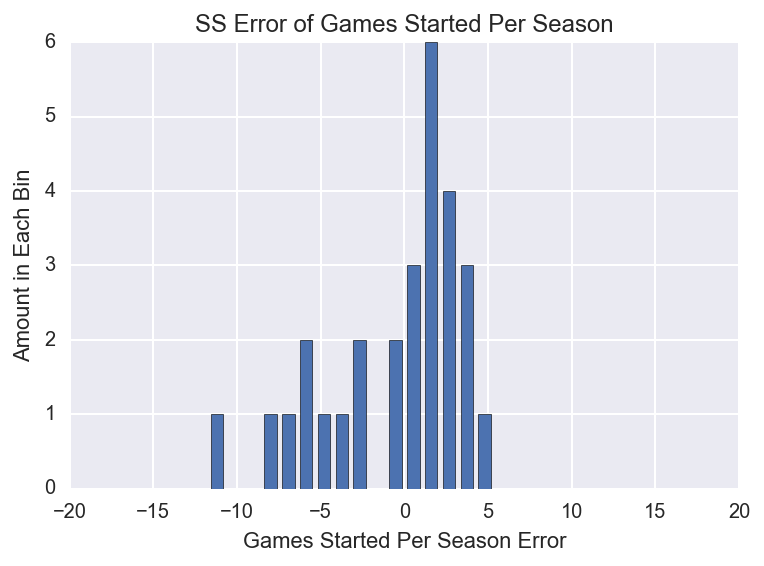

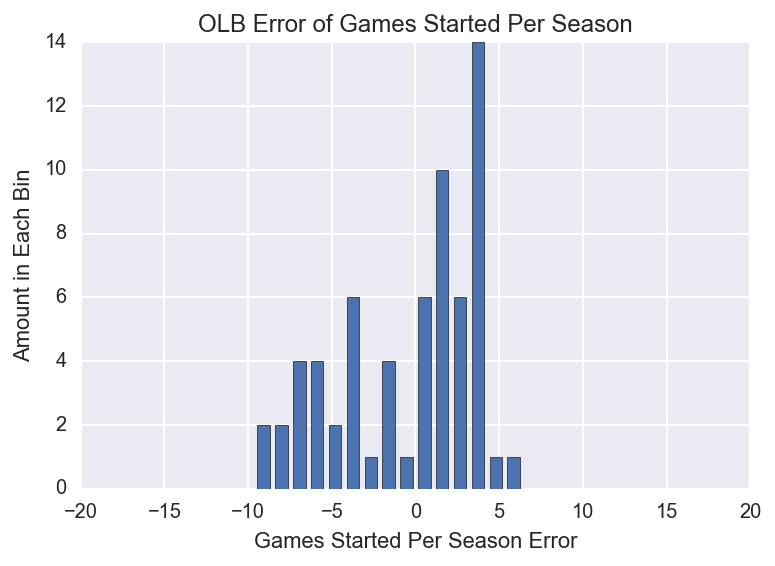

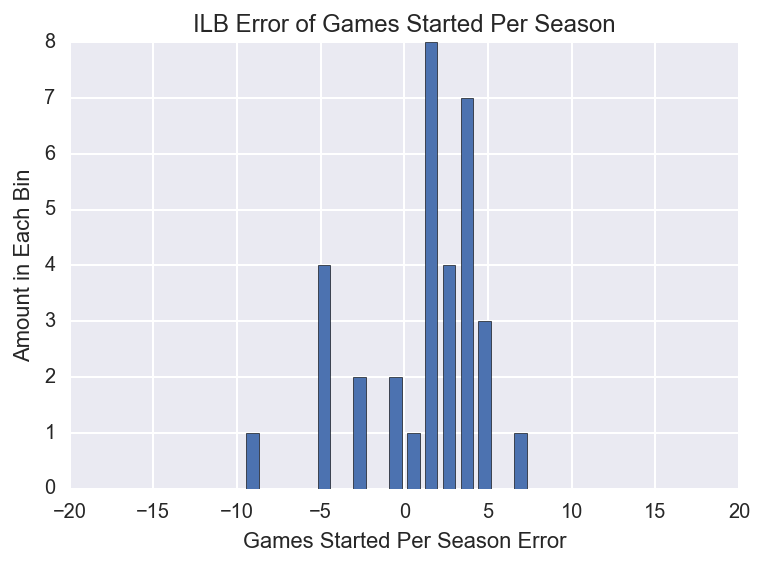

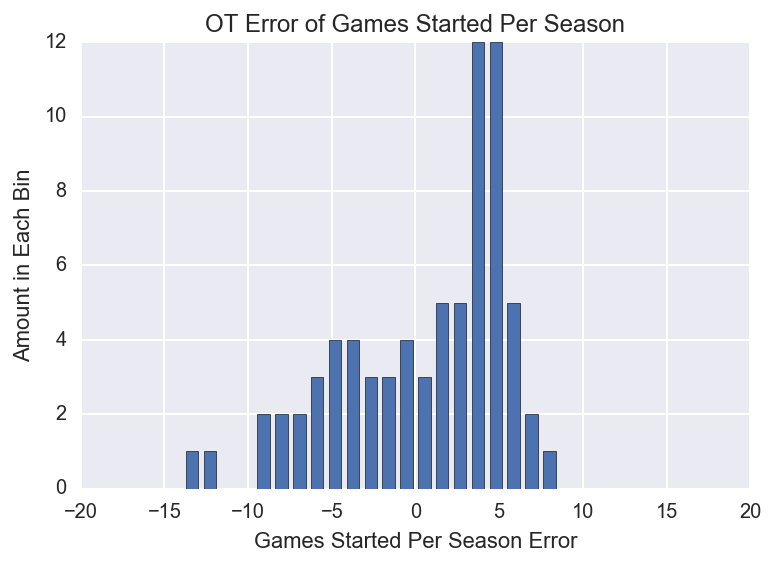

In [99]:
for i in range(len(G_errors)):
    hist, bins = np.histogram(G_errors[i], bins=30,range=(-16,16))
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.title('{} Error of Games Started Per Season'.format(poss[i]))
    plt.ylabel('Amount in Each Bin')
    plt.xlabel('Games Started Per Season Error')
    plt.show()
    plt.show()